In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif, chi2, f_classif, SequentialFeatureSelector
from sklearn.preprocessing import StandardScaler, PowerTransformer, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix, matthews_corrcoef
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_error
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, RandomForestRegressor
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('american_companies_bankruptcy.csv')

In [3]:
df.columns = df.columns.str.strip()
df.columns

Index(['company_name', 'status_label', 'year', 'Current assets',
       'Cost of goods sold', 'Depreciation and amortization', 'EBITDA',
       'Inventory', 'Net Income', 'Total Receivables', 'Market value',
       'Net sales', 'Total assets', 'Total Long-term debt', 'EBIT',
       'Gross Profit', 'Total Current Liabilities', 'Retained Earnings',
       'Total Revenue', 'Total Liabilities', 'Total Operating Expenses'],
      dtype='object')

In [4]:
df_grouped = df.groupby('company_name').agg({
    'Current assets': 'sum',
    'Cost of goods sold': 'sum',
    'Depreciation and amortization': 'mean',
    'EBITDA': 'mean',
    'Inventory': 'mean',
    'Net Income': 'mean',
    'Total Receivables': 'sum',
    'Market value': 'mean',
    'Net sales': 'mean',
    'Total assets': 'sum',
    'Total Long-term debt': 'sum',
    'EBIT': 'mean',
    'Gross Profit': 'mean',
    'Total Current Liabilities': 'sum',
    'Retained Earnings': 'mean',
    'Total Revenue': 'mean',
    'Total Liabilities': 'sum',
    'Total Operating Expenses': 'sum',
    'status_label': 'last'
}).reset_index()


In [5]:
df1 = df_grouped

In [6]:
df1['EBITDA_Margin'] = df1['EBITDA'] / df1['Total Revenue']
df1['Net_Profit_Margin'] = df1['Net Income'] / df1['Total Revenue']
df1['Debt_Ratio'] = df1['Total Liabilities'] / df1['Total assets']
df1['ROI'] = (df1['Net Income'] / (df1['Total assets'] + df1['Total Liabilities'])) * 100
df1['Asset_Turnover'] = df1['Net sales'] / df1['Total assets']
df1['Operating_Profit_Margin'] = df1['EBIT'] / df1['Total Revenue']
df1['PE_Ratio'] = df1['Market value'] / df1['Net Income']
df1['Working_Capital'] = df1['Current assets'] - df1['Total Current Liabilities']


In [66]:
reg_inv_data.columns

Index(['Depreciation and amortization', 'EBITDA', 'Inventory', 'Net Income',
       'Total Receivables', 'Market value', 'Total assets', 'EBITDA_Margin',
       'Net_Profit_Margin', 'Debt_Ratio', 'ROI', 'Asset_Turnover', 'PE_Ratio',
       'Working_Capital_Ratio', 'Debt_to_Equity_Ratio', 'ROA', 'Hybrid_Score',
       'Investment Amount', 'company_name'],
      dtype='object')

In [7]:
df1.columns

Index(['company_name', 'Current assets', 'Cost of goods sold',
       'Depreciation and amortization', 'EBITDA', 'Inventory', 'Net Income',
       'Total Receivables', 'Market value', 'Net sales', 'Total assets',
       'Total Long-term debt', 'EBIT', 'Gross Profit',
       'Total Current Liabilities', 'Retained Earnings', 'Total Revenue',
       'Total Liabilities', 'Total Operating Expenses', 'status_label',
       'EBITDA_Margin', 'Net_Profit_Margin', 'Debt_Ratio', 'ROI',
       'Asset_Turnover', 'Operating_Profit_Margin', 'PE_Ratio',
       'Working_Capital'],
      dtype='object')

In [8]:
for col in ['Current assets', 'Cost of goods sold',
       'Depreciation and amortization', 'EBITDA', 'Inventory', 'Net Income',
       'Total Receivables', 'Market value', 'Net sales', 'Total assets',
       'Total Long-term debt', 'EBIT', 'Gross Profit',
       'Total Current Liabilities', 'Retained Earnings', 'Total Revenue',
       'Total Liabilities', 'Total Operating Expenses',
       'EBITDA_Margin', 'Net_Profit_Margin', 'Debt_Ratio', 'ROI',
       'Asset_Turnover', 'Operating_Profit_Margin', 'PE_Ratio',
       'Working_Capital']:
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    print(f"{col}:")
    print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
    print(f"Outliers: {df1[(df1[col] < lower_bound) | (df1[col] > upper_bound)].shape[0]}")

Current assets:
Lower Bound: -3164.613, Upper Bound: 5470.975
Outliers: 1400
Cost of goods sold:
Lower Bound: -4060.342, Upper Bound: 6941.574
Outliers: 1522
Depreciation and amortization:
Lower Bound: -43.05139285714285, Upper Bound: 74.44203571428571
Outliers: 1326
EBITDA:
Lower Bound: -112.14393055555556, Upper Bound: 179.66945833333332
Outliers: 1473
Inventory:
Lower Bound: -55.98485576923078, Upper Bound: 93.33091346153847
Outliers: 1448
Net Income:
Lower Bound: -53.000617835595776, Upper Bound: 51.85978266716943
Outliers: 2050
Total Receivables:
Lower Bound: -890.2047500000001, Upper Bound: 1517.46125
Outliers: 1449
Market value:
Lower Bound: -1127.64524, Upper Bound: 1969.2952200000002
Outliers: 1257
Net sales:
Lower Bound: -830.9919107142858, Upper Bound: 1437.2331845238095
Outliers: 1333
Total assets:
Lower Bound: -8160.151749999999, Upper Bound: 13994.35025
Outliers: 1455
Total Long-term debt:
Lower Bound: -1636.9220000000003, Upper Bound: 2734.634
Outliers: 1584
EBIT:
Lower 

In [9]:
def handle_outliers_iqr(df1, features):
    for feature in features:
        Q1 = df1[feature].quantile(0.25)
        Q3 = df1[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        df1[feature] = np.where(df1[feature] < lower_bound, lower_bound, df1[feature])
        df1[feature] = np.where(df1[feature] > upper_bound, upper_bound, df1[feature])
    
    return df1

features = [
    'Current assets', 'Cost of goods sold',
       'Depreciation and amortization', 'EBITDA', 'Inventory', 'Net Income',
       'Total Receivables', 'Market value', 'Net sales', 'Total assets',
       'Total Long-term debt', 'EBIT', 'Gross Profit',
       'Total Current Liabilities', 'Retained Earnings', 'Total Revenue',
       'Total Liabilities', 'Total Operating Expenses',
       'EBITDA_Margin', 'Net_Profit_Margin', 'Debt_Ratio', 'ROI',
       'Asset_Turnover', 'Operating_Profit_Margin', 'PE_Ratio',
       'Working_Capital'
]

# Process outliers
df1 = handle_outliers_iqr(df1, features)

In [10]:
print(df1['status_label'].unique())

['alive' 'failed']


In [11]:
df1['status_label'] = np.where(df1['status_label'] == 'alive', 1, 0)

In [12]:
df1['status_label'].value_counts()

status_label
1    8362
0     609
Name: count, dtype: int64

In [13]:
move_column = df1.pop('status_label')
df1['status_label'] = move_column

In [14]:
df1

,company_name,Current assets,Cost of goods sold,Depreciation and amortization,EBITDA,Inventory,Net Income,Total Receivables,Market value,Net sales,...,Total Operating Expenses,EBITDA_Margin,Net_Profit_Margin,Debt_Ratio,ROI,Asset_Turnover,Operating_Profit_Margin,PE_Ratio,Working_Capital,status_label
0,C_1,5470.975,6941.574,50.438474,127.150053,93.330913,36.263000,1517.46125,748.541426,1341.480579,...,10346.4175,0.094783,0.027032,0.516345,0.096470,0.054114,0.057184,20.642016,2117.78275,1
1,C_10,5470.975,6941.574,74.442036,179.669458,93.330913,51.859783,1517.46125,1969.295220,1437.233185,...,10346.4175,0.335686,0.094462,0.692801,0.077607,0.013908,0.207728,16.700041,-1266.59925,1
2,C_100,663.087,380.072,11.712067,29.013467,1.691133,22.602200,143.74900,624.822920,63.418400,...,516.0740,0.457493,0.356398,0.103722,0.765114,0.023695,0.272814,27.644341,449.95700,1
3,C_1000,5470.975,6941.574,74.442036,179.669458,93.330913,51.859783,1517.46125,1969.295220,1437.233185,...,10346.4175,0.306428,0.161618,0.693773,0.397989,0.041710,0.278215,21.313677,2117.78275,1
4,C_1001,5470.975,6941.574,74.442036,179.669458,93.330913,51.859783,1517.46125,1969.295220,1437.233185,...,10346.4175,0.019363,0.009048,0.779673,0.090789,0.178581,0.016237,19.162632,2117.78275,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8966,C_995,5470.975,6941.574,74.442036,179.669458,93.330913,51.859783,1517.46125,1969.295220,1437.233185,...,10346.4175,0.104797,0.024869,0.934194,0.285616,0.222137,0.070121,20.651639,1734.37900,1
8967,C_996,236.307,303.301,3.350333,6.168333,50.680667,-0.297667,79.57300,15.173600,124.424333,...,354.7680,0.049575,-0.002392,0.758308,-0.047520,0.349256,0.022648,-50.975140,105.86800,1
8968,C_997,5470.975,6941.574,74.442036,179.669458,93.330913,51.859783,1517.46125,1969.295220,1437.233185,...,10346.4175,0.166990,0.097016,0.651418,0.258583,0.044016,0.142156,21.309037,578.30000,1
8969,C_998,5470.975,6941.574,74.442036,179.669458,93.330913,-53.000618,1517.46125,1969.295220,1437.233185,...,10346.4175,0.079947,-0.021622,0.693392,-0.064262,0.050328,0.054376,-37.093364,2117.78275,0


In [15]:
investment_data = df1[df1['status_label'] == 1]

In [16]:
investment_data

,company_name,Current assets,Cost of goods sold,Depreciation and amortization,EBITDA,Inventory,Net Income,Total Receivables,Market value,Net sales,...,Total Operating Expenses,EBITDA_Margin,Net_Profit_Margin,Debt_Ratio,ROI,Asset_Turnover,Operating_Profit_Margin,PE_Ratio,Working_Capital,status_label
0,C_1,5470.975,6941.574,50.438474,127.150053,93.330913,36.263000,1517.46125,748.541426,1341.480579,...,10346.4175,0.094783,0.027032,0.516345,0.096470,0.054114,0.057184,20.642016,2117.78275,1
1,C_10,5470.975,6941.574,74.442036,179.669458,93.330913,51.859783,1517.46125,1969.295220,1437.233185,...,10346.4175,0.335686,0.094462,0.692801,0.077607,0.013908,0.207728,16.700041,-1266.59925,1
2,C_100,663.087,380.072,11.712067,29.013467,1.691133,22.602200,143.74900,624.822920,63.418400,...,516.0740,0.457493,0.356398,0.103722,0.765114,0.023695,0.272814,27.644341,449.95700,1
3,C_1000,5470.975,6941.574,74.442036,179.669458,93.330913,51.859783,1517.46125,1969.295220,1437.233185,...,10346.4175,0.306428,0.161618,0.693773,0.397989,0.041710,0.278215,21.313677,2117.78275,1
4,C_1001,5470.975,6941.574,74.442036,179.669458,93.330913,51.859783,1517.46125,1969.295220,1437.233185,...,10346.4175,0.019363,0.009048,0.779673,0.090789,0.178581,0.016237,19.162632,2117.78275,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8965,C_994,99.776,161.777,1.470850,3.534200,0.000000,1.191800,9.73600,47.391590,15.024800,...,229.8120,0.235224,0.079322,0.273726,0.084144,0.013512,0.137330,39.764717,35.19000,1
8966,C_995,5470.975,6941.574,74.442036,179.669458,93.330913,51.859783,1517.46125,1969.295220,1437.233185,...,10346.4175,0.104797,0.024869,0.934194,0.285616,0.222137,0.070121,20.651639,1734.37900,1
8967,C_996,236.307,303.301,3.350333,6.168333,50.680667,-0.297667,79.57300,15.173600,124.424333,...,354.7680,0.049575,-0.002392,0.758308,-0.047520,0.349256,0.022648,-50.975140,105.86800,1
8968,C_997,5470.975,6941.574,74.442036,179.669458,93.330913,51.859783,1517.46125,1969.295220,1437.233185,...,10346.4175,0.166990,0.097016,0.651418,0.258583,0.044016,0.142156,21.309037,578.30000,1


In [17]:
investment_data['status_label'].value_counts()

status_label
1    8362
Name: count, dtype: int64

In [18]:
investment_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8362 entries, 0 to 8970
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   company_name                   8362 non-null   object 
 1   Current assets                 8362 non-null   float64
 2   Cost of goods sold             8362 non-null   float64
 3   Depreciation and amortization  8362 non-null   float64
 4   EBITDA                         8362 non-null   float64
 5   Inventory                      8362 non-null   float64
 6   Net Income                     8362 non-null   float64
 7   Total Receivables              8362 non-null   float64
 8   Market value                   8362 non-null   float64
 9   Net sales                      8362 non-null   float64
 10  Total assets                   8362 non-null   float64
 11  Total Long-term debt           8362 non-null   float64
 12  EBIT                           8362 non-null   float6

In [19]:
reg_inv_data = investment_data.drop(['status_label', 'company_name'], axis = 1)

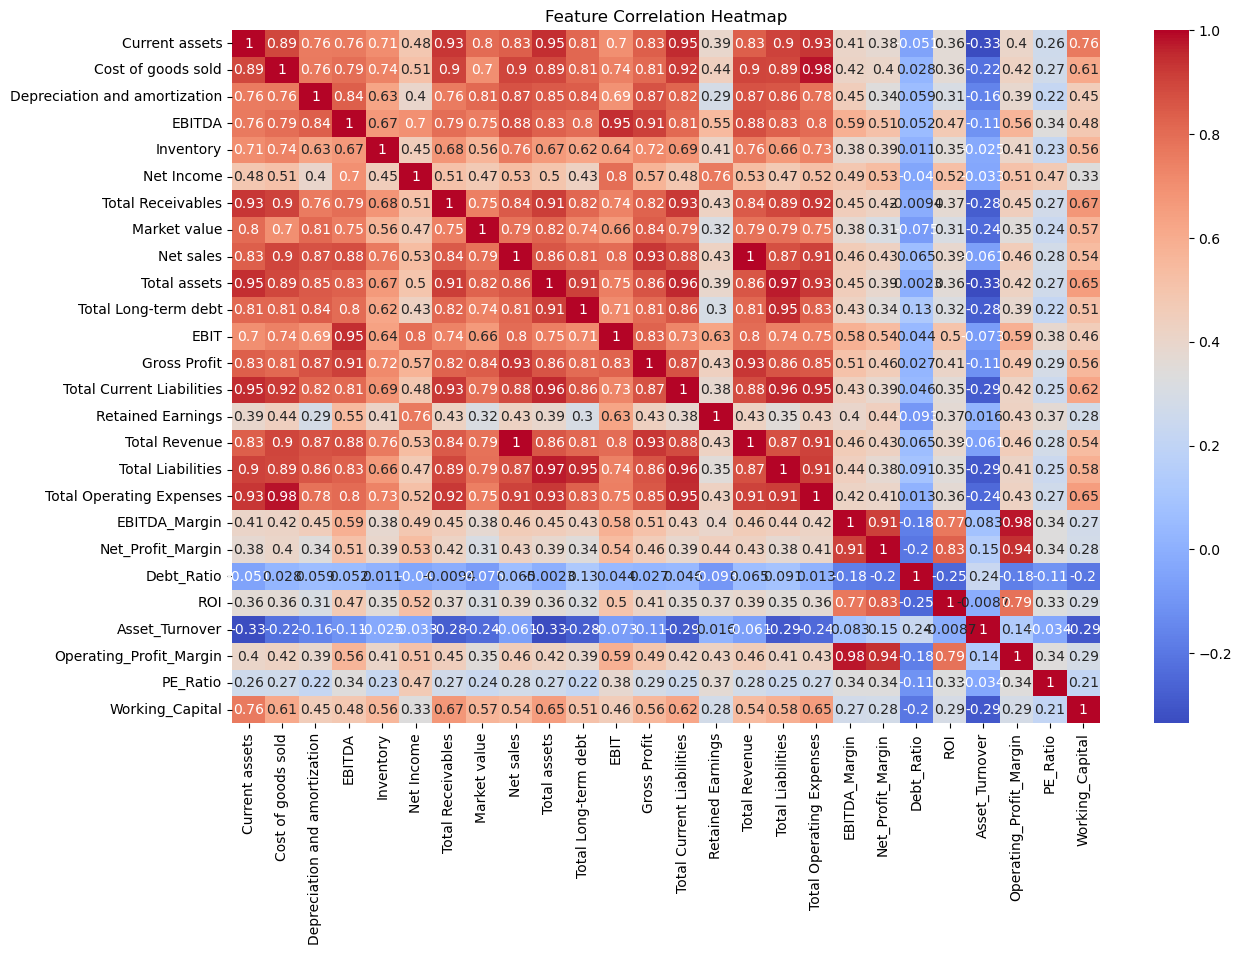

In [20]:
plt.figure(figsize=(14,9))
sns.heatmap(reg_inv_data.corr(), annot=True, cmap = 'coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

In [21]:
vif_data = pd.DataFrame()
vif_data['Current assets', 'Cost of goods sold', 'Depreciation and amortization',
       'EBITDA', 'Inventory', 'Net Income', 'Total Receivables',
       'Market value', 'Net sales', 'Total assets', 'Total Long-term debt',
       'EBIT', 'Gross Profit', 'Total Current Liabilities',
       'Retained Earnings', 'Total Revenue', 'Total Liabilities',
       'Total Operating Expenses', 'EBITDA_Margin', 'Net_Profit_Margin',
       'Debt_Ratio', 'ROI', 'Asset_Turnover', 'Operating_Profit_Margin',
       'PE_Ratio', 'Working_Capital'] = reg_inv_data.columns
vif_data["VIF"] = [variance_inflation_factor(reg_inv_data.values, i) for i in range(reg_inv_data.shape[1])]

print(vif_data)


D:\Adi\Anaconda\envs\adik1\lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


   (Current assets, Cost of goods sold, Depreciation and amortization, EBITDA, Inventory, Net Income, Total Receivables, Market value, Net sales, Total assets, Total Long-term debt, EBIT, Gross Profit, Total Current Liabilities, Retained Earnings, Total Revenue, Total Liabilities, Total Operating Expenses, EBITDA_Margin, Net_Profit_Margin, Debt_Ratio, ROI, Asset_Turnover, Operating_Profit_Margin, PE_Ratio, Working_Capital)  \
0                                      Current assets                                                                                                                                                                                                                                                                                                                                                                                        
1                                  Cost of goods sold                                                                                       

In [22]:
reg_inv_data = reg_inv_data.drop(columns=["Net sales", "Total Revenue", "Total Liabilities", "Gross Profit"])
reg_inv_data["Working_Capital_Ratio"] = reg_inv_data["Working_Capital"] / reg_inv_data["Total Current Liabilities"]
reg_inv_data["Debt_to_Equity_Ratio"] = reg_inv_data["Total Long-term debt"] / reg_inv_data["Retained Earnings"]
reg_inv_data["ROA"] = reg_inv_data["Net Income"] / reg_inv_data["Total assets"]
# Drop the original features after combining
reg_inv_data = reg_inv_data.drop(columns=["Working_Capital", "Total Current Liabilities", "Total Long-term debt", "Retained Earnings"])
reg_inv_data = reg_inv_data.drop(columns=["EBIT", "Operating_Profit_Margin"])
reg_inv_data = reg_inv_data.drop(columns=["Cost of goods sold"])
reg_inv_data = reg_inv_data.drop(columns=["Total Operating Expenses"])
reg_inv_data = reg_inv_data.drop(columns=["Current assets"])

In [23]:
vif_data = pd.DataFrame()
vif_data['Current assets', 'Cost of goods sold', 'Depreciation and amortization',
       'EBITDA', 'Inventory', 'Net Income', 'Total Receivables',
       'Market value', 'Net sales', 'Total assets', 'Total Long-term debt',
       'EBIT', 'Gross Profit', 'Total Current Liabilities',
       'Retained Earnings', 'Total Revenue', 'Total Liabilities',
       'Total Operating Expenses', 'EBITDA_Margin', 'Net_Profit_Margin',
       'Debt_Ratio', 'ROI', 'Asset_Turnover', 'Operating_Profit_Margin',
       'PE_Ratio', 'Working_Capital'] = reg_inv_data.columns
vif_data["VIF"] = [variance_inflation_factor(reg_inv_data.values, i) for i in range(reg_inv_data.shape[1])]

print(vif_data)

   (Current assets, Cost of goods sold, Depreciation and amortization, EBITDA, Inventory, Net Income, Total Receivables, Market value, Net sales, Total assets, Total Long-term debt, EBIT, Gross Profit, Total Current Liabilities, Retained Earnings, Total Revenue, Total Liabilities, Total Operating Expenses, EBITDA_Margin, Net_Profit_Margin, Debt_Ratio, ROI, Asset_Turnover, Operating_Profit_Margin, PE_Ratio, Working_Capital)  \
0                       Depreciation and amortization                                                                                                                                                                                                                                                                                                                                                                                        
1                                              EBITDA                                                                                       

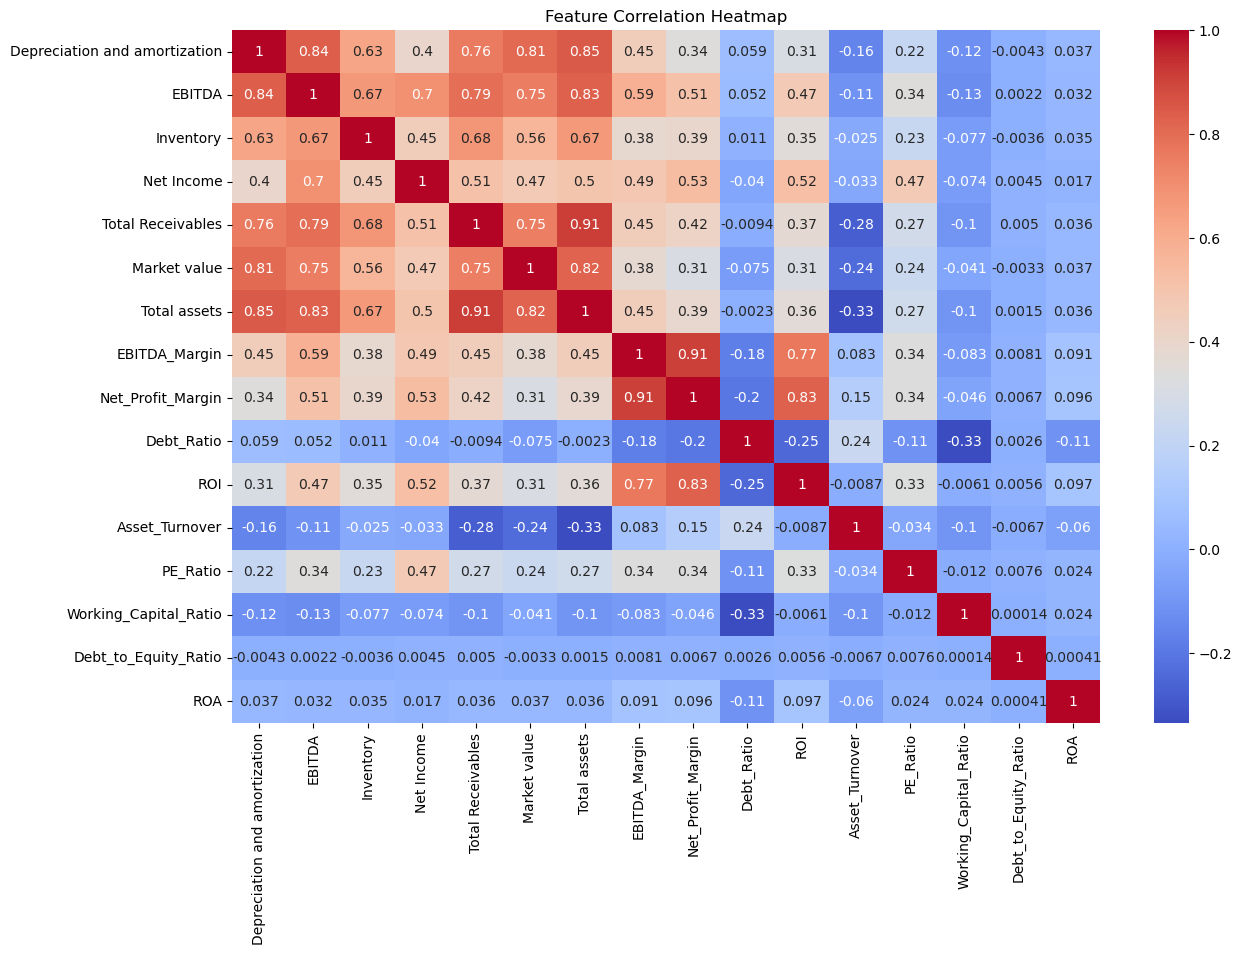

In [24]:
plt.figure(figsize=(14,9))
sns.heatmap(reg_inv_data.corr(), annot=True, cmap = 'coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

In [25]:
reg_inv_data.columns

Index(['Depreciation and amortization', 'EBITDA', 'Inventory', 'Net Income',
       'Total Receivables', 'Market value', 'Total assets', 'EBITDA_Margin',
       'Net_Profit_Margin', 'Debt_Ratio', 'ROI', 'Asset_Turnover', 'PE_Ratio',
       'Working_Capital_Ratio', 'Debt_to_Equity_Ratio', 'ROA'],
      dtype='object')

In [26]:
# Normalize the features using Min-Max Scaling (you can also use StandardScaler for Z-score)
scaler = MinMaxScaler()
reg_scaled = pd.DataFrame(scaler.fit_transform(reg_inv_data), columns=reg_inv_data.columns)

# Define the weights for each feature (adjusted for ROI importance)
weights = {
    'Depreciation and amortization': 0.05,  # Example weight
    'EBITDA': 0.20,
    'Inventory': 0.05,  # Example weight
    'Net Income': 0.25,
    'Total Receivables': 0.05,  # Example weight
    'Market value': 0.15,
    'Total assets': 0.05,  # Example weight
    'EBITDA_Margin': 0.05,
    'Net_Profit_Margin': 0.05,
    'Debt_Ratio': 0.05,
    'ROI': 0.15,  # Increased importance for ROI
    'Asset_Turnover': 0.05,  # Example weight
    'PE_Ratio': 0.05,
    'Working_Capital_Ratio': 0.05,  # Example weight
    'Debt_to_Equity_Ratio': 0.05,
    'ROA': 0.05
}

# Compute the hybrid score for each row based on the weighted sum of features
reg_scaled['Hybrid_Score'] = 0
for feature in weights.keys():
    reg_scaled['Hybrid_Score'] += reg_scaled[feature] * weights[feature]

# Normalize Hybrid Scores to a defined investment range (e.g., $100K to $1M)
investment_scaler = MinMaxScaler(feature_range=(100000, 1000000))  # Investment range
reg_scaled['Investment Amount'] = investment_scaler.fit_transform(reg_scaled[['Hybrid_Score']])

# Print the resulting DataFrame with Hybrid Scores and Investment Amounts
print(reg_scaled[['Hybrid_Score', 'Investment Amount']])


      Hybrid_Score  Investment Amount
0         0.910217      760760.193102
1         1.105234      926489.471115
2         0.656092      544799.950605
3         1.113518      933529.429041
4         1.106147      927265.705251
...            ...                ...
8357      0.512860      423078.767019
8358      1.121010      939896.106080
8359      0.526963      435063.580301
8360      1.103471      924991.028719
8361      1.111847      932109.104942

[8362 rows x 2 columns]


In [27]:
reg_scaled

,Depreciation and amortization,EBITDA,Inventory,Net Income,Total Receivables,Market value,Total assets,EBITDA_Margin,Net_Profit_Margin,Debt_Ratio,ROI,Asset_Turnover,PE_Ratio,Working_Capital_Ratio,Debt_to_Equity_Ratio,ROA,Hybrid_Score,Investment Amount
0,0.677554,0.820024,1.000000,0.851261,1.000000,0.380106,1.000000,0.590295,0.618262,0.381438,0.614735,0.349566,0.628621,0.012468,0.431899,0.993310,0.910217,760760.193102
1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.769505,0.655452,0.512506,0.613341,0.298828,0.595320,0.007836,0.431899,0.993311,1.105234,926489.471115
2,0.157331,0.483725,0.018120,0.720985,0.094730,0.317282,0.191255,0.860119,0.799917,0.074950,0.664125,0.311178,0.687774,0.017495,0.431603,0.993317,0.656092,544799.950605
3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.747740,0.692490,0.513228,0.637007,0.333912,0.634295,0.012468,0.431899,0.993311,1.113518,933529.429041
4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.534189,0.608344,0.577033,0.614315,0.506638,0.616123,0.012468,0.431899,0.993311,1.106147,927265.705251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8357,0.019758,0.396411,0.000000,0.516805,0.006416,0.024065,0.079460,0.694771,0.647102,0.201226,0.613824,0.298328,0.790164,0.011615,0.431712,0.993308,0.512860,423078.767019
8358,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.597744,0.617070,0.691808,0.628706,0.561603,0.628702,0.011943,0.431899,0.993311,1.121010,939896.106080
8359,0.045006,0.405438,0.543021,0.502601,0.052438,0.007705,0.025457,0.556664,0.602034,0.561163,0.604099,0.722022,0.023619,0.012617,0.431739,0.993306,0.526963,435063.580301
8360,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.644010,0.656860,0.481768,0.626709,0.336824,0.634255,0.010361,0.431899,0.993311,1.103471,924991.028719


In [28]:

# Drop the target variable (Hybrid_Score) to get features
X = reg_scaled[['Depreciation and amortization', 'EBITDA', 'Inventory', 'Net Income',
       'Total Receivables', 'Market value', 'Total assets',
       'EBITDA_Margin', 'Net_Profit_Margin', 'Debt_Ratio', 'ROI',
       'Asset_Turnover','PE_Ratio',
       'Working_Capital_Ratio', 'Debt_to_Equity_Ratio', 'ROA']]

# The target variable: Hybrid Score or Investment Amount (depending on your preference)
y = reg_scaled['Investment Amount']  # You can use 'Hybrid_Score' here as well, but we’ll go with 'Investment Amount'


In [29]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

In [30]:

# Initialize the model
model = LinearRegression()

In [31]:

# Fit the model
model.fit(X_train, y_train)

LinearRegression()

In [32]:
# Predict on the test set
y_pred = model.predict(X_test)


In [33]:
y_pred

array([410332.57079503, 268750.35273897, 357814.48850572, ...,
       356869.87757612, 373832.21944749, 253139.57311237])

In [34]:
y_pred_train = model.predict(X_train)
y_pred_train

array([933045.32812314, 221807.40648342, 312714.8031611 , ...,
       362102.21077982, 863879.14217216, 391975.72265061])

In [35]:
mse = mean_squared_error(y_train, y_pred_train)
print('Mean Squared Error :', mse)

rmse = np.sqrt(mse)
print('Root Mean Squared Error :', rmse)

mae = mean_absolute_error(y_train, y_pred_train)
print('Mean Absolute Error :', mae)

r_square = r2_score(y_train, y_pred_train)
print('R-Squared Value :', r_square)

adj_r2 = 1 - (((1- r_square)*(y_train.shape[0] - 1))/ (y_train.shape[0] - X_train.shape[1] - 1))
print('Adj-R-Squared Value :', adj_r2)

Mean Squared Error : 3.1623001295432177e-19
Root Mean Squared Error : 5.623433230281318e-10
Mean Absolute Error : 4.697490506077992e-10
R-Squared Value : 1.0
Adj-R-Squared Value : 1.0


In [36]:
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error :', mse)

rmse = np.sqrt(mse)
print('Root Mean Squared Error :', rmse)

mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error :', mae)

r_square = r2_score(y_test, y_pred)
print('R-Squared Value :', r_square)

adj_r2 = 1 - (((1- r_square)*(y_test.shape[0] - 1))/ (y_test.shape[0] - X_test.shape[1] - 1))
print('Adj-R-Squared Value :', adj_r2)

Mean Squared Error : 3.0790128613745757e-19
Root Mean Squared Error : 5.54888534876562e-10
Mean Absolute Error : 4.5972918558284615e-10
R-Squared Value : 1.0
Adj-R-Squared Value : 1.0


In [37]:
rf_model = RandomForestRegressor(n_estimators=95, max_depth=12, min_samples_split=7, min_samples_leaf=4,random_state=69, oob_score=True)
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=12, min_samples_leaf=4, min_samples_split=7,
                      n_estimators=95, oob_score=True, random_state=69)

In [38]:
def evaluation(string, model, ind_var, y_act):
    print(string.center(50, '*'))
    pred = model.predict(ind_var)
    
    mse = mean_squared_error(y_act, pred)
    print('MSE:', mse)
    
    rmse = np.sqrt(mse)
    print('RMSE:', rmse)
    
    mae = mean_absolute_error(y_act, pred)
    print('MAE :', mae)
    
    r_squared = r2_score(y_act, pred)
    print('R2_Score :', r_squared)
    
    adj_r2 = 1 - (((1-r_squared)*(ind_var.shape[0] - 1))/(ind_var.shape[0]- ind_var.shape[1]-1))
    print('Adj-R2_Score :', adj_r2)
    
evaluation('Test Data Evaluation', rf_model, X_test, y_test)
print()

evaluation('Train Data Evaluation', rf_model, X_train, y_train)

***************Test Data Evaluation***************
MSE: 225992655.6379113
RMSE: 15033.052106538822
MAE : 9833.294261823095
R2_Score : 0.9949821744392946
Adj-R2_Score : 0.994933693032911

**************Train Data Evaluation***************
MSE: 79282206.2705822
RMSE: 8904.055608012688
MAE : 5837.928934045048
R2_Score : 0.9982553893035778
Adj-R2_Score : 0.9982512055848813


In [39]:
rf_model.oob_score_

0.9950004038007193

In [40]:
rf_model.feature_importances_

array([1.07871291e-03, 7.38211574e-01, 2.44891319e-03, 1.01358936e-01,
       1.82183987e-03, 1.20332101e-02, 1.92261630e-03, 8.60658028e-04,
       1.15828788e-01, 1.60634379e-03, 1.74714472e-02, 7.74902006e-04,
       1.74636697e-03, 2.80524767e-04, 1.89165951e-04, 2.36600095e-03])

<Axes: >

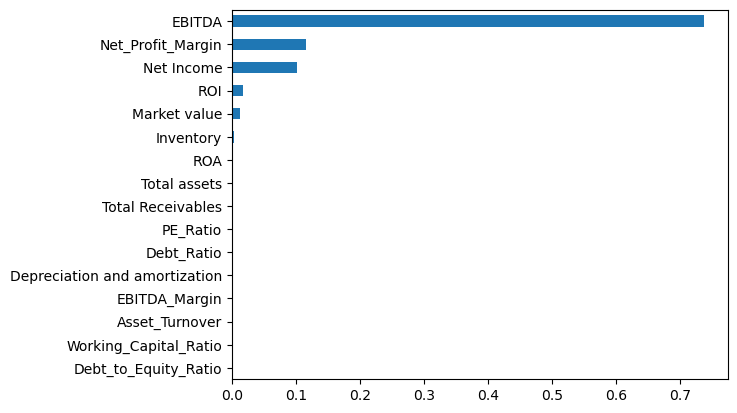

In [41]:
s1 = pd.Series(rf_model.feature_importances_, index=X.columns)
s1.sort_values().plot(kind = 'barh')

D:\Adi\Anaconda\envs\adik1\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
100%|===================| 1671/1673 [00:43<00:00]        

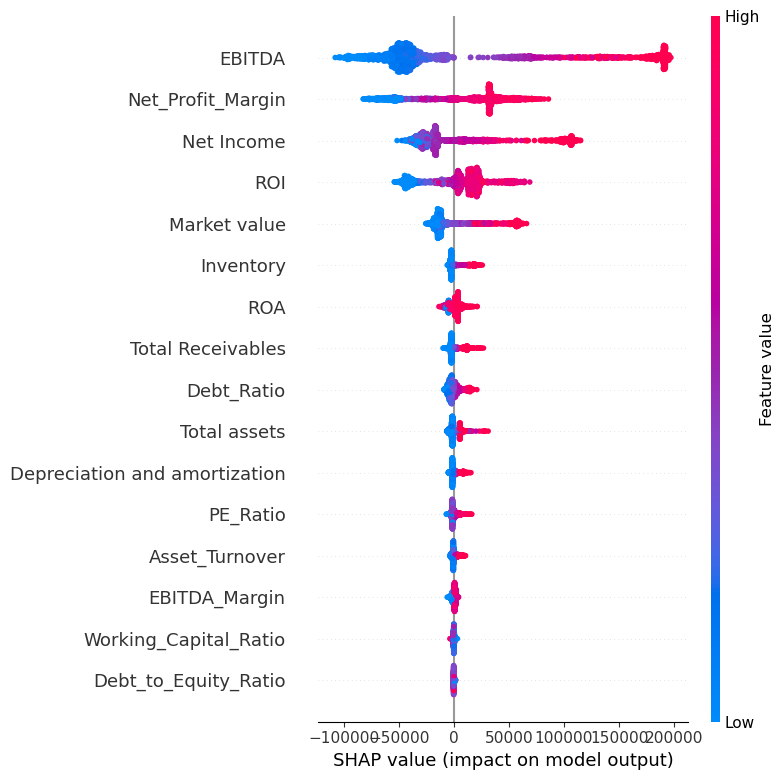

In [42]:
import shap

# Create a SHAP explainer for the trained linear regression model
explainer = shap.Explainer(rf_model, X_train)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Visualize the SHAP summary plot
shap.summary_plot(shap_values, X_test)


## **HYPERPARAMETER TUNING**

In [35]:
rf_model = RandomForestRegressor(random_state=69, )

param_grid = {'n_estimators':np.arange(70,120,10) , 'max_depth':np.arange(8,15),
             'min_samples_split' : np.arange(4,10),'min_samples_leaf':np.arange(3,9)}

rscv_rf_clf = RandomizedSearchCV(rf_model, param_grid, cv=3,n_iter=150)
rscv_rf_clf.fit(X_train, y_train)
rscv_rf_clf.best_estimator_

RandomForestRegressor(max_depth=np.int64(13), min_samples_leaf=np.int64(3),
                      min_samples_split=np.int64(4), n_estimators=np.int64(110),
                      random_state=69)

In [43]:
rf_model1 = RandomForestRegressor(n_estimators=110, max_depth=13, min_samples_split=4, min_samples_leaf=3,random_state=69, oob_score=True)
rf_model1.fit(X_train, y_train)

RandomForestRegressor(max_depth=13, min_samples_leaf=3, min_samples_split=4,
                      n_estimators=110, oob_score=True, random_state=69)

In [44]:
def evaluation(string, model, ind_var, y_act):
    print(string.center(50, '*'))
    pred = model.predict(ind_var)
    
    mse = mean_squared_error(y_act, pred)
    print('MSE:', mse)
    
    rmse = np.sqrt(mse)
    print('RMSE:', rmse)
    
    mae = mean_absolute_error(y_act, pred)
    print('MAE :', mae)
    
    r_squared = r2_score(y_act, pred)
    print('R2_Score :', r_squared)
    
    adj_r2 = 1 - (((1-r_squared)*(ind_var.shape[0] - 1))/(ind_var.shape[0]- ind_var.shape[1]-1))
    print('Adj-R2_Score :', adj_r2)
    
evaluation('Test Data Evaluation', rf_model1, X_test, y_test)
print()

evaluation('Train Data Evaluation', rf_model1, X_train, y_train)

***************Test Data Evaluation***************
MSE: 209095420.7814604
RMSE: 14460.13211493797
MAE : 9392.416774005207
R2_Score : 0.9953573520163207
Adj-R2_Score : 0.995312495514063

**************Train Data Evaluation***************
MSE: 58736798.120097846
RMSE: 7663.99361430435
MAE : 4976.418311322057
R2_Score : 0.998707492499336
Adj-R2_Score : 0.9987043929609651


In [45]:
rf_model1.oob_score_

0.9952914867629404

In [46]:
reg_scaled.info

<bound method DataFrame.info of       Depreciation and amortization    EBITDA  Inventory  Net Income  \
0                          0.677554  0.820024   1.000000    0.851261   
1                          1.000000  1.000000   1.000000    1.000000   
2                          0.157331  0.483725   0.018120    0.720985   
3                          1.000000  1.000000   1.000000    1.000000   
4                          1.000000  1.000000   1.000000    1.000000   
...                             ...       ...        ...         ...   
8357                       0.019758  0.396411   0.000000    0.516805   
8358                       1.000000  1.000000   1.000000    1.000000   
8359                       0.045006  0.405438   0.543021    0.502601   
8360                       1.000000  1.000000   1.000000    1.000000   
8361                       1.000000  1.000000   1.000000    1.000000   

      Total Receivables  Market value  Total assets  EBITDA_Margin  \
0              1.000000      0.38

In [47]:
reg_inv_data.info

<bound method DataFrame.info of       Depreciation and amortization      EBITDA  Inventory  Net Income  \
0                         50.438474  127.150053  93.330913   36.263000   
1                         74.442036  179.669458  93.330913   51.859783   
2                         11.712067   29.013467   1.691133   22.602200   
3                         74.442036  179.669458  93.330913   51.859783   
4                         74.442036  179.669458  93.330913   51.859783   
...                             ...         ...        ...         ...   
8965                       1.470850    3.534200   0.000000    1.191800   
8966                      74.442036  179.669458  93.330913   51.859783   
8967                       3.350333    6.168333  50.680667   -0.297667   
8968                      74.442036  179.669458  93.330913   51.859783   
8970                      74.442036  179.669458  93.330913   51.859783   

      Total Receivables  Market value  Total assets  EBITDA_Margin  \
0        

In [48]:
reg_inv_data = pd.concat([reg_inv_data, reg_scaled [['Hybrid_Score', 'Investment Amount']]], axis = 1)

In [49]:
#reg_inv_data.dropna(inplace=True)

In [50]:
reg_inv_data

,Depreciation and amortization,EBITDA,Inventory,Net Income,Total Receivables,Market value,Total assets,EBITDA_Margin,Net_Profit_Margin,Debt_Ratio,ROI,Asset_Turnover,PE_Ratio,Working_Capital_Ratio,Debt_to_Equity_Ratio,ROA,Hybrid_Score,Investment Amount
0,50.438474,127.150053,93.330913,36.263000,1517.46125,748.541426,13994.35025,0.094783,0.027032,0.516345,0.096470,0.054114,20.642016,0.772000,11.527381,0.002591,0.910217,760760.193102
1,74.442036,179.669458,93.330913,51.859783,1517.46125,1969.295220,13994.35025,0.335686,0.094462,0.692801,0.077607,0.013908,16.700041,-0.461716,11.527381,0.003706,1.105234,926489.471115
2,11.712067,29.013467,1.691133,22.602200,143.74900,624.822920,2676.48500,0.457493,0.356398,0.103722,0.765114,0.023695,27.644341,2.111186,0.096406,0.008445,0.656092,544799.950605
3,74.442036,179.669458,93.330913,51.859783,1517.46125,1969.295220,13994.35025,0.306428,0.161618,0.693773,0.397989,0.041710,21.313677,0.772000,11.527381,0.003706,1.113518,933529.429041
4,74.442036,179.669458,93.330913,51.859783,1517.46125,1969.295220,13994.35025,0.019363,0.009048,0.779673,0.090789,0.178581,19.162632,0.772000,11.527381,0.003706,1.106147,927265.705251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8240,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.606399,502570.269598
8291,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.513756,423840.295113
8304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.039804,870885.465454
8345,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.534630,441578.966778


In [51]:
reg_inv_data['company_name'] = investment_data['company_name']

In [52]:
reg_inv_data1= reg_inv_data[['company_name'] + [col for col in reg_inv_data.columns if col!= 'company_name']]

In [53]:
reg_inv_data1.head(8363)

,company_name,Depreciation and amortization,EBITDA,Inventory,Net Income,Total Receivables,Market value,Total assets,EBITDA_Margin,Net_Profit_Margin,Debt_Ratio,ROI,Asset_Turnover,PE_Ratio,Working_Capital_Ratio,Debt_to_Equity_Ratio,ROA,Hybrid_Score,Investment Amount
0,C_1,50.438474,127.150053,93.330913,36.263000,1517.46125,748.541426,13994.35025,0.094783,0.027032,0.516345,0.096470,0.054114,20.642016,0.772000,11.527381,0.002591,0.910217,760760.193102
1,C_10,74.442036,179.669458,93.330913,51.859783,1517.46125,1969.295220,13994.35025,0.335686,0.094462,0.692801,0.077607,0.013908,16.700041,-0.461716,11.527381,0.003706,1.105234,926489.471115
2,C_100,11.712067,29.013467,1.691133,22.602200,143.74900,624.822920,2676.48500,0.457493,0.356398,0.103722,0.765114,0.023695,27.644341,2.111186,0.096406,0.008445,0.656092,544799.950605
3,C_1000,74.442036,179.669458,93.330913,51.859783,1517.46125,1969.295220,13994.35025,0.306428,0.161618,0.693773,0.397989,0.041710,21.313677,0.772000,11.527381,0.003706,1.113518,933529.429041
4,C_1001,74.442036,179.669458,93.330913,51.859783,1517.46125,1969.295220,13994.35025,0.019363,0.009048,0.779673,0.090789,0.178581,19.162632,0.772000,11.527381,0.003706,1.106147,927265.705251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8966,C_995,74.442036,179.669458,93.330913,51.859783,1517.46125,1969.295220,13994.35025,0.104797,0.024869,0.934194,0.285616,0.222137,20.651639,0.632237,11.527381,0.003706,NaN,NaN
8967,C_996,3.350333,6.168333,50.680667,-0.297667,79.57300,15.173600,356.25500,0.049575,-0.002392,0.758308,-0.047520,0.349256,-50.975140,0.811628,5.355117,-0.000836,NaN,NaN
8968,C_997,74.442036,179.669458,93.330913,51.859783,1517.46125,1969.295220,13994.35025,0.166990,0.097016,0.651418,0.258583,0.044016,21.309037,0.210809,11.527381,0.003706,NaN,NaN
8970,C_999,74.442036,179.669458,93.330913,51.859783,1517.46125,1969.295220,13994.35025,0.331074,0.171303,0.650336,0.376900,0.036311,19.733143,0.772000,11.527381,0.003706,NaN,NaN


In [54]:
# Drop rows after the first 8363 rows
reg_inv_data1 = reg_inv_data1.drop(reg_inv_data.index[8362:])


## **DATA TIE BACK**

In [55]:
predictions = rf_model1.predict(X)

In [56]:
predictions

array([757991.8599994 , 926273.81196797, 542699.21726101, ...,
       435352.3816666 , 924732.38102685, 928941.27001998])

In [57]:
predictions.shape

(8362,)

In [58]:
X.shape

(8362, 16)

In [59]:
reg_inv_data1['Predictions'] = predictions

In [60]:
reg_inv_data1

,company_name,Depreciation and amortization,EBITDA,Inventory,Net Income,Total Receivables,Market value,Total assets,EBITDA_Margin,Net_Profit_Margin,Debt_Ratio,ROI,Asset_Turnover,PE_Ratio,Working_Capital_Ratio,Debt_to_Equity_Ratio,ROA,Hybrid_Score,Investment Amount,Predictions
0,C_1,50.438474,127.150053,93.330913,36.263000,1517.46125,748.541426,13994.35025,0.094783,0.027032,0.516345,0.096470,0.054114,20.642016,0.772000,11.527381,0.002591,0.910217,760760.193102,757991.859999
1,C_10,74.442036,179.669458,93.330913,51.859783,1517.46125,1969.295220,13994.35025,0.335686,0.094462,0.692801,0.077607,0.013908,16.700041,-0.461716,11.527381,0.003706,1.105234,926489.471115,926273.811968
2,C_100,11.712067,29.013467,1.691133,22.602200,143.74900,624.822920,2676.48500,0.457493,0.356398,0.103722,0.765114,0.023695,27.644341,2.111186,0.096406,0.008445,0.656092,544799.950605,542699.217261
3,C_1000,74.442036,179.669458,93.330913,51.859783,1517.46125,1969.295220,13994.35025,0.306428,0.161618,0.693773,0.397989,0.041710,21.313677,0.772000,11.527381,0.003706,1.113518,933529.429041,929861.577293
4,C_1001,74.442036,179.669458,93.330913,51.859783,1517.46125,1969.295220,13994.35025,0.019363,0.009048,0.779673,0.090789,0.178581,19.162632,0.772000,11.527381,0.003706,1.106147,927265.705251,926892.349013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8965,C_994,1.470850,3.534200,0.000000,1.191800,9.73600,47.391590,1111.99400,0.235224,0.079322,0.273726,0.084144,0.013512,39.764717,0.544855,4.315862,0.001072,NaN,NaN,426767.233928
8966,C_995,74.442036,179.669458,93.330913,51.859783,1517.46125,1969.295220,13994.35025,0.104797,0.024869,0.934194,0.285616,0.222137,20.651639,0.632237,11.527381,0.003706,NaN,NaN,932637.725046
8967,C_996,3.350333,6.168333,50.680667,-0.297667,79.57300,15.173600,356.25500,0.049575,-0.002392,0.758308,-0.047520,0.349256,-50.975140,0.811628,5.355117,-0.000836,NaN,NaN,435352.381667
8968,C_997,74.442036,179.669458,93.330913,51.859783,1517.46125,1969.295220,13994.35025,0.166990,0.097016,0.651418,0.258583,0.044016,21.309037,0.210809,11.527381,0.003706,NaN,NaN,924732.381027


In [61]:
reg_inv_data1.to_csv('Regression_Predictions.csv', index=False)

## **API DEPLOYMENT**

In [62]:
import pickle

In [63]:
with open('model.pkl', 'wb') as model_file:
    pickle.dump(rf_model1, model_file)

In [64]:
with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

In [84]:
pip install flask mysql-connector-python


   ---------------------------------------- 0.0/16.1 MB ? eta -:--:--
   - -------------------------------------- 0.5/16.1 MB 3.4 MB/s eta 0:00:05
   --- ------------------------------------ 1.6/16.1 MB 4.2 MB/s eta 0:00:04
   ------- -------------------------------- 2.9/16.1 MB 4.8 MB/s eta 0:00:03
   --------- ------------------------------ 3.9/16.1 MB 4.9 MB/s eta 0:00:03
   ----------- ---------------------------- 4.7/16.1 MB 4.6 MB/s eta 0:00:03
   ------------- -------------------------- 5.2/16.1 MB 4.2 MB/s eta 0:00:03
   -------------- ------------------------- 5.8/16.1 MB 4.1 MB/s eta 0:00:03
   ----------------- ---------------------- 7.1/16.1 MB 4.2 MB/s eta 0:00:03
   --------------------- ------------------ 8.7/16.1 MB 4.6 MB/s eta 0:00:02
   ------------------------ --------------- 10.0/16.1 MB 4.8 MB/s eta 0:00:02
   ----------------------------- ---------- 11.8/16.1 MB 5.1 MB/s eta 0:00:01
   ------------------------------- -------- 12.8/16.1 MB 5.1 MB/s eta 0:00:01
  

In [87]:
pip install pymysql

Note: you may need to restart the kernel to use updated packages.


In [65]:
X_train.columns

Index(['Depreciation and amortization', 'EBITDA', 'Inventory', 'Net Income',
       'Total Receivables', 'Market value', 'Total assets', 'EBITDA_Margin',
       'Net_Profit_Margin', 'Debt_Ratio', 'ROI', 'Asset_Turnover', 'PE_Ratio',
       'Working_Capital_Ratio', 'Debt_to_Equity_Ratio', 'ROA'],
      dtype='object')